In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula as smf
import datetime

vacunacion = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis_std.csv')
hdi = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
muertes_covid = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto50/DefuncionesDEIS_confirmadosPorComuna_std.csv')

In [2]:
vacunacion

,Region,Codigo region,Comuna,Codigo comuna,Fecha,Primera Dosis
0,Arica y Parinacota,15,Arica,15101.0,2020-12-24,0.0
1,Arica y Parinacota,15,Camarones,15102.0,2020-12-24,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,2020-12-24,0.0
3,Arica y Parinacota,15,Putre,15201.0,2020-12-24,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,2020-12-24,NaN
...,...,...,...,...,...,...
72395,Magallanes y la Antartica,12,Rio Verde,12103.0,2021-07-11,0.0
72396,Magallanes y la Antartica,12,San Gregorio,12104.0,2021-07-11,0.0
72397,Magallanes y la Antartica,12,Timaukel,12303.0,2021-07-11,0.0
72398,Magallanes y la Antartica,12,Torres del Paine,12402.0,2021-07-11,0.0


In [3]:
hdi=hdi.rename(columns={'comuna':'Codigo comuna'})
hdi=hdi.loc[:,['Codigo comuna','HDI']]

In [4]:
vacunas_santiago = vacunacion['Codigo comuna'].isin(hdi['Codigo comuna'])
vacunas_santiago =vacunacion.loc[vacunas_santiago == True]

In [5]:
vacunas_santiago

,Region,Codigo region,Comuna,Codigo comuna,Fecha,Primera Dosis
88,Metropolitana,13,Alhue,13502.0,2020-12-24,0.0
89,Metropolitana,13,Buin,13402.0,2020-12-24,0.0
90,Metropolitana,13,Calera de Tango,13403.0,2020-12-24,0.0
91,Metropolitana,13,Cerrillos,13102.0,2020-12-24,0.0
92,Metropolitana,13,Cerro Navia,13103.0,2020-12-24,0.0
...,...,...,...,...,...,...
72173,Metropolitana,13,San Ramon,13131.0,2021-07-11,196.0
72174,Metropolitana,13,Santiago,13101.0,2021-07-11,0.0
72175,Metropolitana,13,Talagante,13601.0,2021-07-11,0.0
72176,Metropolitana,13,Tiltil,13303.0,2021-07-11,0.0


In [6]:
vacunas_santiago.dtypes

Region            object
Codigo region      int64
Comuna            object
Codigo comuna    float64
Fecha             object
Primera Dosis    float64
dtype: object

In [7]:
vacunas_santiago['Fecha'] = pd.to_datetime(vacunas_santiago['Fecha'], dayfirst = True)

<ipython-input-7-f0e700ee3081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacunas_santiago['Fecha'] = pd.to_datetime(vacunas_santiago['Fecha'], dayfirst = True)


In [8]:
vacunas_santiago.dtypes

Region                   object
Codigo region             int64
Comuna                   object
Codigo comuna           float64
Fecha            datetime64[ns]
Primera Dosis           float64
dtype: object

In [9]:
grouper = pd.Grouper(key='Fecha', freq='W')
vacunas_santiago["Semana"] = vacunas_santiago.groupby(grouper).grouper.group_info[0] + 1
vacunas_santiago_semana = vacunas_santiago.groupby(['Semana', 'Codigo comuna']).sum().reset_index()

<ipython-input-9-4ff9a51774c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacunas_santiago["Semana"] = vacunas_santiago.groupby(grouper).grouper.group_info[0] + 1


In [10]:
vacunas_santiago_semana

,Semana,Codigo comuna,Codigo region,Primera Dosis
0,1,13101.0,52,1228.0
1,1,13102.0,52,0.0
2,1,13103.0,52,0.0
3,1,13104.0,52,0.0
4,1,13105.0,52,0.0
...,...,...,...,...
1503,29,13601.0,91,1306.0
1504,29,13602.0,91,450.0
1505,29,13603.0,91,478.0
1506,29,13604.0,91,1379.0


In [11]:
vacunas_santiago_semana = vacunas_santiago_semana.drop('Codigo region', axis = 1)

In [12]:
vacunas_santiago_semana['Primera Dosis'].sum()

5116543.0

In [13]:
muertes_covid

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Defunciones
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-16,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-16,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-16,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-16,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-03-16,NaN
...,...,...,...,...,...,...,...
173393,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,2021-07-07,0.0
173394,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,2021-07-07,0.0
173395,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,2021-07-07,0.0
173396,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,2021-07-07,0.0


In [14]:
muertes_covid['Fecha'] = pd.to_datetime(muertes_covid['Fecha'], dayfirst = True)

In [15]:
muertes_covid

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Defunciones
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-16,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-16,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-16,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-16,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-03-16,NaN
...,...,...,...,...,...,...,...
173393,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,2021-07-07,0.0
173394,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,2021-07-07,0.0
173395,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,2021-07-07,0.0
173396,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,2021-07-07,0.0


In [16]:
muertes_covid_santiago = muertes_covid['Codigo comuna'].isin(hdi['Codigo comuna'])
muertes_covid_santiago = muertes_covid.loc[muertes_covid_santiago == True]

In [17]:
muertes_covid_santiago = muertes_covid_santiago.reset_index().drop('index', axis = 1)

In [18]:
muertes_covid_santiago

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Defunciones
0,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-16,0.0
1,Metropolitana,13,Buin,13402.0,109641.0,2020-03-16,0.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,2020-03-16,0.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,2020-03-16,0.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,2020-03-16,0.0
...,...,...,...,...,...,...,...
24903,Metropolitana,13,San Ramon,13131.0,86510.0,2021-07-07,0.0
24904,Metropolitana,13,Santiago,13101.0,503147.0,2021-07-07,0.0
24905,Metropolitana,13,Talagante,13601.0,81838.0,2021-07-07,0.0
24906,Metropolitana,13,Tiltil,13303.0,21477.0,2021-07-07,0.0


In [19]:
muertes_covid_santiago = muertes_covid_santiago.drop(range(14716))

In [20]:
muertes_covid_santiago['Defunciones'].sum()

6792.0

In [21]:
muertes_covid_santiago = muertes_covid_santiago.reset_index().drop('index', axis = 1)

In [22]:
muertes_covid_santiago["Semana"] = muertes_covid_santiago.groupby(grouper).grouper.group_info[0] + 1

In [23]:
muertes_covid_santiago = muertes_covid_santiago.groupby(['Semana', 'Codigo comuna']).sum('Defunciones').reset_index()

In [24]:
muertes_covid_santiago

,Semana,Codigo comuna,Codigo region,Poblacion,Defunciones
0,1,13101.0,52,2012588.0,2.0
1,1,13102.0,52,355824.0,0.0
2,1,13103.0,52,569860.0,3.0
3,1,13104.0,52,556780.0,2.0
4,1,13105.0,52,688000.0,1.0
...,...,...,...,...,...
1503,29,13601.0,39,245514.0,0.0
1504,29,13602.0,39,120042.0,1.0
1505,29,13603.0,39,120513.0,1.0
1506,29,13604.0,39,222564.0,0.0


In [25]:
muertes_covid_santiago = muertes_covid_santiago.drop(['Codigo region','Poblacion'], axis = 1)

In [26]:
DATOS2 =pd.merge(vacunas_santiago_semana, muertes_covid_santiago, on=['Semana','Codigo comuna'], how='left')



In [27]:
DATOS2

,Semana,Codigo comuna,Primera Dosis,Defunciones
0,1,13101.0,1228.0,2.0
1,1,13102.0,0.0,0.0
2,1,13103.0,0.0,3.0
3,1,13104.0,0.0,2.0
4,1,13105.0,0.0,1.0
...,...,...,...,...
1503,29,13601.0,1306.0,0.0
1504,29,13602.0,450.0,1.0
1505,29,13603.0,478.0,1.0
1506,29,13604.0,1379.0,0.0


In [28]:
DATOS3 =pd.merge(DATOS2, hdi, on=['Codigo comuna'], how='left')



In [29]:
DATOS3

,Semana,Codigo comuna,Primera Dosis,Defunciones,HDI
0,1,13101.0,1228.0,2.0,0.861222
1,1,13102.0,0.0,0.0,0.764616
2,1,13103.0,0.0,3.0,0.718874
3,1,13104.0,0.0,2.0,0.749584
4,1,13105.0,0.0,1.0,0.742015
...,...,...,...,...,...
1503,29,13601.0,1306.0,0.0,0.759548
1504,29,13602.0,450.0,1.0,0.728127
1505,29,13603.0,478.0,1.0,0.776123
1506,29,13604.0,1379.0,0.0,0.719437


In [30]:
vacunacion_1ra = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv")

In [31]:
vacunacion_1ra=vacunacion_1ra.loc[:,['Codigo comuna','Poblacion']]

In [32]:
DATOS = pd.merge(DATOS3, vacunacion_1ra, on=['Codigo comuna'], how='left')

In [33]:
DATOS

,Semana,Codigo comuna,Primera Dosis,Defunciones,HDI,Poblacion
0,1,13101.0,1228.0,2.0,0.861222,503147.0
1,1,13102.0,0.0,0.0,0.764616,88956.0
2,1,13103.0,0.0,3.0,0.718874,142465.0
3,1,13104.0,0.0,2.0,0.749584,139195.0
4,1,13105.0,0.0,1.0,0.742015,172000.0
...,...,...,...,...,...,...
1503,29,13601.0,1306.0,0.0,0.759548,81838.0
1504,29,13602.0,450.0,1.0,0.728127,40014.0
1505,29,13603.0,478.0,1.0,0.776123,40171.0
1506,29,13604.0,1379.0,0.0,0.719437,74188.0


In [34]:
DATOS['Primera Dosis'].sum()

5116543.0

In [35]:
DATOS['Defunciones_100k'] = (DATOS['Defunciones']*100000)/DATOS['Poblacion']

In [36]:
DATOS = DATOS.rename(columns={'Primera Dosis':'Primera_Dosis'})

In [37]:
DATOS2 = DATOS.groupby(['Codigo comuna','HDI','Poblacion']).sum().reset_index()

In [38]:
DATOS2

,Codigo comuna,HDI,Poblacion,Semana,Primera_Dosis,Defunciones,Defunciones_100k
0,13101.0,0.861222,503147.0,435,289664.0,223.0,44.321043
1,13102.0,0.764616,88956.0,435,50012.0,68.0,76.442286
2,13103.0,0.718874,142465.0,435,74917.0,221.0,155.125820
3,13104.0,0.749584,139195.0,435,99163.0,165.0,118.538741
4,13105.0,0.742015,172000.0,435,101296.0,191.0,111.046512
5,13106.0,0.767604,206792.0,435,97504.0,119.0,57.545746
6,13107.0,0.712375,112528.0,435,82033.0,114.0,101.308119
7,13108.0,0.763935,142065.0,435,93925.0,114.0,80.244958
8,13109.0,0.850780,100434.0,435,60910.0,120.0,119.481451
9,13110.0,0.795888,402433.0,435,283353.0,407.0,101.134847


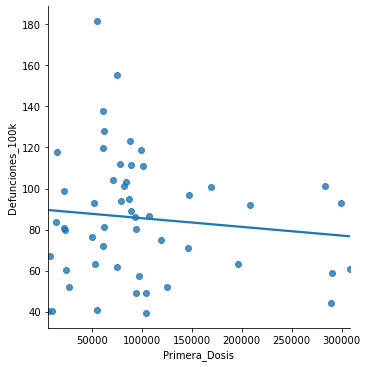

In [39]:
import seaborn as sb

sb.lmplot(x = "Primera_Dosis",
            y = "Defunciones_100k", 
            ci = None,
            data = DATOS2)

In [40]:
import statsmodels.formula.api as smf

In [41]:
model = smf.ols(formula='Defunciones ~ Primera_Dosis + HDI',data=DATOS2)

In [42]:
results = model.fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Defunciones   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     91.53
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           2.84e-17
Time:                        22:54:36   Log-Likelihood:                -277.31
No. Observations:                  52   AIC:                             560.6
Df Residuals:                      49   BIC:                             566.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       470.4608     80.599      5.837

Respecto a los resultados del modelo de regresión, se pueden interpretar lo siguiente.
La cantidad de vacunados de primera dosis y el índice de desarrollo humano se correlacionan en un 78,9% con las defunciones de una comuna.
Asimismo, un 78% de la variación de las defunciones son explicadas por el modelo.
La F-Probability nos dice que si no utilizamos las variables de vacunados de primera dosis ni el índice de desarrollo humano, el modelo sería extremadamente impreciso, lo cual es otro punto a favor para el modelo implementado actualmente.
Extrañamente, la primera dosis presenta un coeficiente muy cercano a 0, pero positivo, lo cual implica que a mayor cantidad de vacunados, mayor será la cantidad de defunciones. Sin embargo, el HDI presenta un coeficiente bastante negativo, lo cual indica que a mayor riqueza de una comuna, menor será la cantidad de defunciones en esta. Además, según la nota [2], puede existir un problema de multicolinealidad, en donde parte del "mérito" de las vacunas puede estar representado en el HDI.
Respecto al omnibus, este se relaciona con la Skew y Kurtosis.

Un parámetro que podría mejorar la precisión del modelo sería incluir la administración de las segundas dosis de las vacunas. Esto haría al modelo más realista y se podría apreciar una influencia más cercana a la realidad o esperado de las vacunas.
